# ep6 clustering of the stock price trends

In this episode, we will perform a clustering analysis and check if we can group stocks into general families within which the price trend of each family member resembles one another.  We will first load the price trends that we have collected from the previous episode and perform principal component analysis to generate the list of principal components of each stock, i.e., `pd_stock_price_red`.

In [1]:
import pandas as pd
df_stock_price_trend = pd.read_csv('stock_price_trend.csv',header=None)
df_stock_price_trend.rename(columns={0:'Symbol'},inplace=True)
df_stock_price_trend.set_index(['Symbol'],inplace=True)
print(len(df_stock_price_trend),'stocks loaded')

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
df_stock_price_red = pd.DataFrame(pca.fit_transform(df_stock_price_trend),columns=['PC1','PC2','PC3'],index=df_stock_price_trend.index)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
df_stock_price_red.head(10)

500 stocks loaded
[0.59202313 0.16167806 0.08941634]
0.8431175267624642


,PC1,PC2,PC3
Symbol,,,
MMM,-0.202427,-2.175365,-0.306284
ABT,3.280617,-0.416211,-0.024012
ABBV,2.119794,-0.656858,1.485148
ABMD,4.247093,1.180635,-0.423926
ACN,2.415816,-0.729568,-0.562100
ATVI,5.541820,1.589000,0.822418
ADBE,4.759140,1.812122,-0.008734
AMD,4.679859,1.783912,-0.337912
AAP,0.024972,-3.275190,-0.483464


Below we plot the weight distribution of all original attribute in the first three principal components.

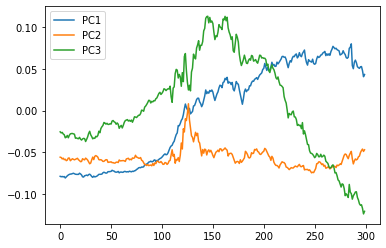

In [5]:
import matplotlib.pyplot as plt
plt.plot(pca.components_[0],label='PC1')
plt.plot(pca.components_[1],label='PC2')
plt.plot(pca.components_[2],label='PC3')
plt.legend()
plt.show()

As can be seen from the figure above, the weights of all constituenting attributes to the first principal component present a monotonically increasing trend.  Consequently, a stock with sustained increase in price would produce a high first principal component, shown below.  The second principal component characterizes the rate of recovery amid the COVID pandemic and the third principal component characterizes reversal in price trend post COVID pandemic.

In [7]:
df_stock_price_red.sort_values(by=['PC1'])

,PC1,PC2,PC3
Symbol,,,
WFC,-5.591294,2.206313,0.463282
VNO,-5.250553,1.554718,0.557511
OXY,-5.090226,2.591658,0.625537
SPG,-5.056929,1.425665,-0.324741
UAL,-4.999297,1.565880,-0.575479
...,...,...,...
REGN,5.552738,0.107878,2.620966
WST,5.690711,2.031119,-0.603256
AMZN,5.788525,2.436894,-0.040528


Below we will observe the price trends of two stocks with high and low `PC1`.

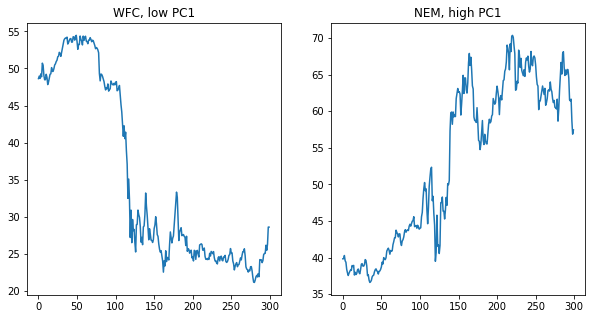

In [6]:
from my_stock import read_stock
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
df = read_stock('WFC')
ax1.plot(df['Close'])
ax1.set_title('WFC, low PC1')
df = read_stock('NEM')
ax2.plot(df['Close'])
ax2.set_title('NEM, high PC1')
plt.show()

We observe the effect of `PC2` on the price trends below.

In [8]:
df_stock_price_red.sort_values(by=['PC2'])

,PC1,PC2,PC3
Symbol,,,
TIF,0.933546,-3.506338,2.473537
AZO,0.869831,-3.491580,0.263182
AAP,0.024972,-3.275190,-0.483464
GPC,-0.606695,-3.245201,-0.691854
PEP,0.399550,-3.212499,0.727246
...,...,...,...
GILD,1.319581,3.005637,5.032284
FTI,-4.604696,3.082314,0.101913
COST,3.792512,3.208050,-1.372395


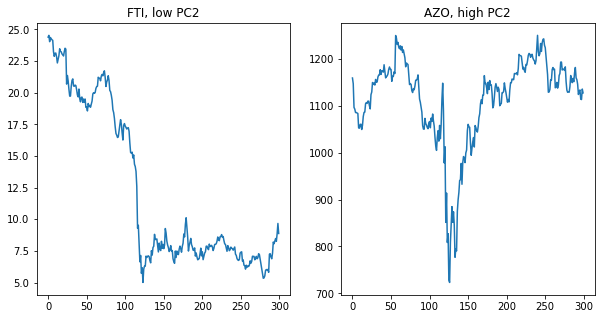

In [9]:
from my_stock import read_stock
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
df = read_stock('FTI')
ax1.plot(df['Close'])
ax1.set_title('FTI, low PC2')
df = read_stock('AZO')
ax2.plot(df['Close'])
ax2.set_title('AZO, high PC2')
plt.show()

In [10]:
df_stock_price_red.sort_values(by=['PC3'])

,PC1,PC2,PC3
Symbol,,,
UPS,3.214477,2.010122,-2.708827
FDX,2.876006,2.411104,-2.346323
DE,2.120106,1.760490,-1.991651
LB,2.370048,2.572023,-1.980476
GLW,1.367014,0.091331,-1.973787
...,...,...,...
CTXS,3.646269,2.124938,3.379721
LLY,4.138856,0.501402,3.402072
VRTX,3.550130,0.265273,3.693973


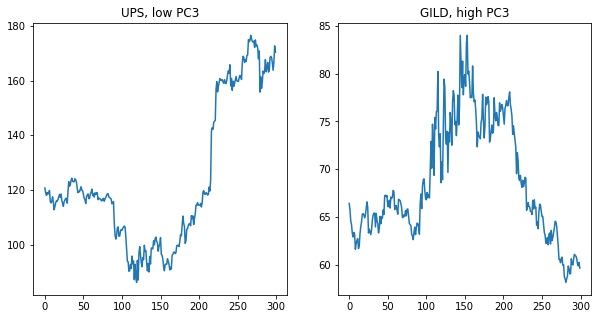

In [11]:
from my_stock import read_stock
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
df = read_stock('UPS')
ax1.plot(df['Close'])
ax1.set_title('UPS, low PC3')
df = read_stock('GILD')
ax2.plot(df['Close'])
ax2.set_title('GILD, high PC3')
plt.show()

We will now perform clustering analysis on the list of principal components.  We first peform a sweep on the number of clusters, i.e., `n_clusters`, from 2 to 29 to understand the effect of the number of clusters on the cumulative distance of all stocks to their corresponding cluster centers.

In [12]:
from sklearn.cluster import KMeans
ls_inertia_res = []
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters, random_state=0).fit(df_stock_price_red)
    ls_inertia_res.append([n_clusters,kmeans.inertia_])
    
df_inertia_res = pd.DataFrame(ls_inertia_res,columns=['Cluster','Inertia'])

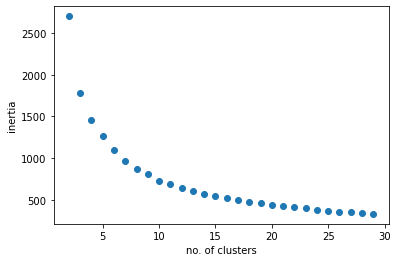

In [13]:
import matplotlib.pyplot as plt
plt.plot(df_inertia_res['Cluster'],df_inertia_res['Inertia'],'o')
plt.xlabel('no. of clusters')
plt.ylabel('inertia')
plt.show()

As can be seen, the reduction in `intertia` slows down when the number of clusters reaches 4.  Therefore, we will use 4 clusters for the clustering analysis.

In [14]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_stock_price_red)
df_stock_price_red['Cluster'] = kmeans.labels_
df_stock_price_red.head(10)

,PC1,PC2,PC3,Cluster
Symbol,,,,
MMM,-0.202427,-2.175365,-0.306284,0
ABT,3.280617,-0.416211,-0.024012,2
ABBV,2.119794,-0.656858,1.485148,2
ABMD,4.247093,1.180635,-0.423926,1
ACN,2.415816,-0.729568,-0.562100,2
ATVI,5.541820,1.589000,0.822418,1
ADBE,4.759140,1.812122,-0.008734,1
AMD,4.679859,1.783912,-0.337912,1
AAP,0.024972,-3.275190,-0.483464,0


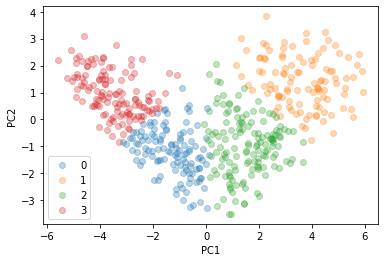

In [15]:
import matplotlib.pyplot as plt
for name,group in df_stock_price_red.groupby(['Cluster']):    
    plt.scatter(group['PC1'],group['PC2'],alpha=0.3,label=name)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

We pick four representative stocks, one from each cluster: `['ZION','ANSS','CDW','INFO']`, and I would like to plot the price trend of these four stocks.

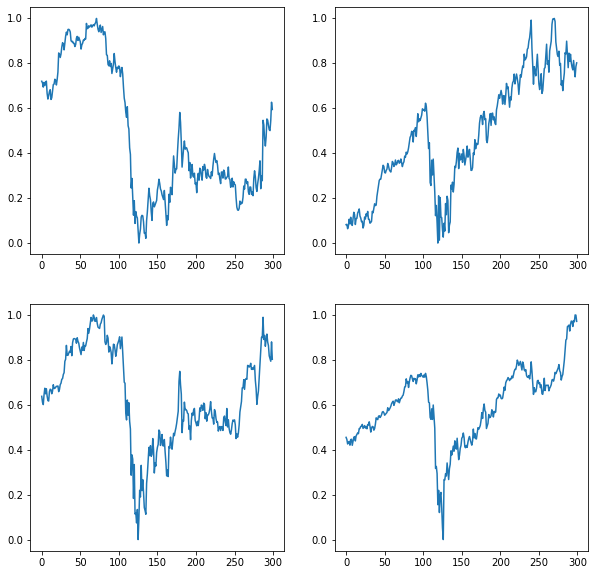

In [16]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
df = read_stock('ZION')['Close']
df = (df-df.min()) / (df.max()-df.min())
ax[0][0].plot(df)

df = read_stock('ANSS')['Close']
df = (df-df.min()) / (df.max()-df.min())
ax[0][1].plot(df)

df = read_stock('CDW')['Close']
df = (df-df.min()) / (df.max()-df.min())
ax[1][0].plot(df)

df = read_stock('INFO')['Close']
df = (df-df.min()) / (df.max()-df.min())
ax[1][1].plot(df)
plt.show()

Now, we will load the optimized parameters per stock.

In [17]:
df_opti = pd.read_csv('opti.csv')
df_opti.set_index(['Symbol'],inplace=True)
df_opti.head(10)

,Security,GICSSector,GICS Sub-Industry,Benchmark Gain %,d,r,Max. Strategy Gain %
Symbol,,,,,,,
MMM,3M Company,Industrials,Industrial Conglomerates,2.0,5,3,15
ABT,Abbott Laboratories,Health Care,Health Care Equipment,32.0,5,9,21
ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,40.0,2,5,54
ABMD,ABIOMED Inc,Health Care,Health Care Equipment,40.0,4,9,76
ACN,Accenture plc,Information Technology,IT Consulting & Other Services,24.0,2,10,34
ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,38.0,3,6,43
ADBE,Adobe Inc.,Information Technology,Application Software,62.0,2,8,66
AMD,Advanced Micro Devices Inc,Information Technology,Semiconductors,173.0,2,5,64
AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,-7.0,7,5,2


In [18]:
df_stocks = df_opti.merge(df_stock_price_red,left_index=True,right_index=True)
df_stocks.head(10)

,Security,GICSSector,GICS Sub-Industry,Benchmark Gain %,d,r,Max. Strategy Gain %,PC1,PC2,PC3,Cluster
Symbol,,,,,,,,,,,
MMM,3M Company,Industrials,Industrial Conglomerates,2.0,5,3,15,-0.202427,-2.175365,-0.306284,0
ABT,Abbott Laboratories,Health Care,Health Care Equipment,32.0,5,9,21,3.280617,-0.416211,-0.024012,2
ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,40.0,2,5,54,2.119794,-0.656858,1.485148,2
ABMD,ABIOMED Inc,Health Care,Health Care Equipment,40.0,4,9,76,4.247093,1.180635,-0.423926,1
ACN,Accenture plc,Information Technology,IT Consulting & Other Services,24.0,2,10,34,2.415816,-0.729568,-0.562100,2
ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,38.0,3,6,43,5.541820,1.589000,0.822418,1
ADBE,Adobe Inc.,Information Technology,Application Software,62.0,2,8,66,4.759140,1.812122,-0.008734,1
AMD,Advanced Micro Devices Inc,Information Technology,Semiconductors,173.0,2,5,64,4.679859,1.783912,-0.337912,1
AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,-7.0,7,5,2,0.024972,-3.275190,-0.483464,0


In [19]:
df_stocks[['Max. Strategy Gain %','Cluster']].groupby('Cluster').agg(['mean','std','max','min'])

Max. Strategy Gain %                    
                        mean        std  max min
Cluster                                         
0                  20.833333  15.066984   82  -4
1                  48.833333  33.986941  183  -7
2                  29.293706  18.009322  105   0
3                  22.279070  20.174232  116  -3

As can be seen from the statistics above, it appears that `Cluster 1` stocks outperform all other clusters.